# Text Classification

## Choosing Features
The first steps in creating a classifier are 
- Finding labeled data to train the classifier
- Deciding what features of the input are relevant, and how to encode those features

In [1]:
import nltk
from nltk.corpus import names
import random

def gender_features(word):
    return {'last_letter': word[-1]}

labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [2]:
classifier.classify(gender_features('Neo'))

'male'

In [3]:
classifier.classify(gender_features('Trinity'))

'female'

In [4]:
#accuracy
nltk.classify.accuracy(classifier, test_set)

0.726

In [5]:
#informative features
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     33.1 : 1.0
             last_letter = 'k'              male : female =     31.1 : 1.0
             last_letter = 'v'              male : female =     17.7 : 1.0
             last_letter = 'f'              male : female =     16.8 : 1.0
             last_letter = 'p'              male : female =     11.3 : 1.0


In [6]:
#apply features returns an object that acts like a list but does not store all the feature sets in memory
from nltk.classify import apply_features
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

In [7]:
#more features
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.752

### Development Set
A very productive method for refining the feature set is error analysis. First, we select a **development set**, containing the corpus data for creating the model. This development set is then subdivided into the training set and the dev-test set.



In [8]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [9]:
#train a model using the training set and then run it on the dev-test set
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, devtest_set)

0.748

In [10]:
#using the dev-test set, we can generate a list of the errors that the classifier makes when predicting name genders
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )
        
for (tag, guess, name) in sorted(errors):
    print('correct={:<8} guess={:<8s} name={:<30}'.format(tag, guess, name))

correct=female   guess=male     name=Abagail                       
correct=female   guess=male     name=Aeriell                       
correct=female   guess=male     name=Allyson                       
correct=female   guess=male     name=Alys                          
correct=female   guess=male     name=Amber                         
correct=female   guess=male     name=Ambur                         
correct=female   guess=male     name=April                         
correct=female   guess=male     name=Ardys                         
correct=female   guess=male     name=Arlen                         
correct=female   guess=male     name=Ayn                           
correct=female   guess=male     name=Bell                          
correct=female   guess=male     name=Cal                           
correct=female   guess=male     name=Camel                         
correct=female   guess=male     name=Carolin                       
correct=female   guess=male     name=Carolynn   

In [11]:
#note that single letter at the end is not predictive, so use last TWO letters
def gender_features(word):
    return {'suffix1': word[-1:], 'suffix2': word[-2:]}

train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, devtest_set)

0.776

## Movie Review Corpus

In [12]:
from nltk.corpus import movie_reviews
import random
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
random.shuffle(documents) #random order

In [13]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features["contains({})".format(word)] = (word in document_words)
    return features

sample = document_features(movie_reviews.words("pos/cv957_8737.txt"))
dict(list(sample.items())[0:20])

{'contains(,)': True,
 'contains(the)': True,
 'contains(.)': True,
 'contains(a)': True,
 'contains(and)': True,
 'contains(of)': True,
 'contains(to)': True,
 "contains(')": True,
 'contains(is)': True,
 'contains(in)': True,
 'contains(s)': True,
 'contains(")': True,
 'contains(it)': True,
 'contains(that)': True,
 'contains(-)': True,
 'contains())': True,
 'contains(()': True,
 'contains(as)': True,
 'contains(with)': True,
 'contains(for)': True}

In [14]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.75

In [15]:
classifier.show_most_informative_features(5)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     13.8 : 1.0
         contains(mulan) = True              pos : neg    =      9.0 : 1.0
        contains(seagal) = True              neg : pos    =      7.4 : 1.0
   contains(wonderfully) = True              pos : neg    =      7.3 : 1.0
         contains(damon) = True              pos : neg    =      5.6 : 1.0


In [16]:
import pandas as pd

movies_df = pd.DataFrame(documents, columns=["words", "category"])
movies_df.head()    

,words,category
0,"["", gordy, "", is, not, a, movie, ,, it, is, a,...",neg
1,"[deserves, recognition, for, :, making, this, ...",neg
2,"[note, :, some, may, consider, portions, of, t...",pos
3,"["", the, beach, "", is, a, structurally, confus...",neg
4,"[mighty, joe, young, blunders, about, for, nea...",neg


In [17]:
#remove punctuation
import string
punc = string.punctuation
movies_df["words"] = movies_df["words"].apply(lambda x: [word for word in x if word not in punc])
movies_df.head()

,words,category
0,"[gordy, is, not, a, movie, it, is, a, 90, minu...",neg
1,"[deserves, recognition, for, making, this, rel...",neg
2,"[note, some, may, consider, portions, of, the,...",pos
3,"[the, beach, is, a, structurally, confusing, f...",neg
4,"[mighty, joe, young, blunders, about, for, nea...",neg


In [18]:
#check for null values
movies_df.isnull().sum()

words       0
category    0
dtype: int64

In [19]:
#review length
movies_df["length"] = movies_df["words"].apply(len)
movies_df.head()

,words,category,length
0,"[gordy, is, not, a, movie, it, is, a, 90, minu...",neg,502
1,"[deserves, recognition, for, making, this, rel...",neg,184
2,"[note, some, may, consider, portions, of, the,...",pos,982
3,"[the, beach, is, a, structurally, confusing, f...",neg,580
4,"[mighty, joe, young, blunders, about, for, nea...",neg,739


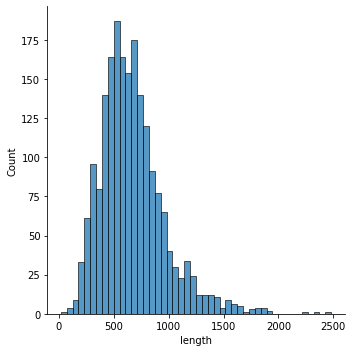

In [20]:
#visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(movies_df["length"],kde=False)

In [21]:
#remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
movies_df["words"] = movies_df["words"].apply(lambda x: [word for word in x if word not in stop_words])

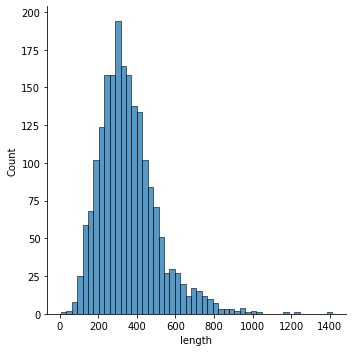

In [22]:
#update length
movies_df["length"] = movies_df["words"].apply(len)
sns.displot(movies_df["length"],kde=False)

In [23]:
#join the words 
movies_df["text"] = [' '.join(map(str, l)) for l in movies_df["words"]]
movies_df.head()

,words,category,length,text
0,"[gordy, movie, 90, minute, long, sesame, stree...",neg,253,gordy movie 90 minute long sesame street skit ...
1,"[deserves, recognition, making, relatively, yo...",neg,107,deserves recognition making relatively youthfu...
2,"[note, may, consider, portions, following, tex...",pos,552,note may consider portions following text spoi...
3,"[beach, structurally, confusing, film, describ...",neg,302,beach structurally confusing film describe mul...
4,"[mighty, joe, young, blunders, nearly, twenty,...",neg,363,mighty joe young blunders nearly twenty minute...


<AxesSubplot:xlabel='category', ylabel='count'>

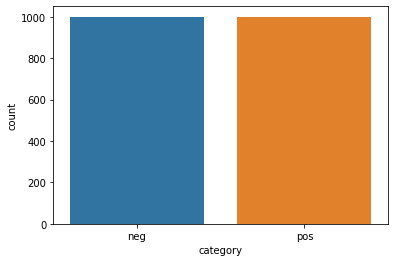

In [24]:
# visualization of categories
sns.countplot(x = movies_df["category"])

In [25]:
# extract the category column to be the target 'y' variable
y = movies_df.category

# text is the single feature used in classification
X1 = movies_df.text

### Vectorize

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(X1)
feature_names = count_vectorizer.get_feature_names_out()

In [27]:
len(feature_names)

39516

In [28]:
feature_names[30000:30010]

array(['rueff', 'rueland', 'ruffian', 'ruffians', 'ruffini', 'ruffle',
       'rufus', 'rug', 'rugby', 'rugged'], dtype=object)

In [29]:
X = X.toarray()
print(X.shape)
X[0]

(2000, 39516)


array([0, 0, 0, ..., 0, 0, 0])

In [30]:
y = movies_df.category
print(y.shape)
y[0]

(2000,)


'neg'

### Split into to testing and training set

We're using sci kit learns's [test_train_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. The default size for the test set is 0.25.  This has arandom_state parameter to produce reproducible output across multiple function calls.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)

print('Accuracy of NB  classifier on training set: {:.2f}'.format(clf_nb.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'.format(clf_nb.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.98
Accuracy of NB classifier on test set: 0.79


In [33]:
# Predict and calculate accuracy
from sklearn.metrics import accuracy_score, classification_report

y_predict = clf_nb.predict(X_test)
score=accuracy_score(y_test,y_predict)
print("Accuracy: {}%".format(round(score*100,2)))

Accuracy: 78.75%


In [34]:
#The support is the number of samples of the true response that lie in that class.
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.80      0.81      0.80       216
         pos       0.77      0.77      0.77       184

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



### Confusion Matrix

In [35]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_predict)
print(cm)

[[174  42]
 [ 43 141]]


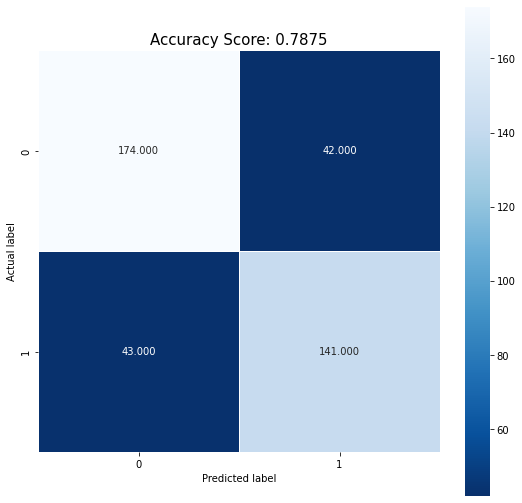

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### TF-IDF
Use TF-IDF instead of bag-of-words to see if it improves the classifier.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer(smooth_idf=False )
tf_idf = transformer.fit_transform(X1)
feature_names = transformer.get_feature_names_out()
len(feature_names)

39516

In [40]:
#split into test/train
X_train, X_test, y_train, y_test = train_test_split(tf_idf, y, test_size = 0.2, random_state=0) 

In [41]:
#classify

clf_nb.fit(X_train, y_train)
y_predict = clf_nb.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.87      0.73      0.79       216
         pos       0.73      0.87      0.79       184

    accuracy                           0.79       400
   macro avg       0.80      0.80      0.79       400
weighted avg       0.80      0.79      0.79       400



### N-Grams

In [42]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
count_vectorizer = CountVectorizer(ngram_range=(1, 2)) #unigrams and bi-grams
ngrams = count_vectorizer.fit_transform(X1)

#fit the ngrams count to the tfidf transformers
ngrams_tfidf = transformer.fit_transform(ngrams)

feature_names = count_vectorizer.get_feature_names_out()
len(feature_names)

567258

In [43]:
#split into test/train
X_train, X_test, y_train, y_test = train_test_split(ngrams_tfidf, y, test_size = 0.2, random_state=0)

In [44]:
#classify

clf_nb.fit(X_train, y_train)
y_predict = clf_nb.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.88      0.58      0.70       216
         pos       0.65      0.91      0.76       184

    accuracy                           0.73       400
   macro avg       0.76      0.74      0.73       400
weighted avg       0.77      0.73      0.72       400



### Other Classifiers

More information on these classifiers is available from the [Sci-Kit learn documents](https://scikit-learn.org/stable/supervised_learning.html).

In [45]:
# decision trees
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_predict = clf_dt.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.68      0.66      0.67       216
         pos       0.62      0.64      0.63       184

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400



In [46]:
#SVM
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)
y_predict = clf_svm.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.84      0.72      0.78       216
         pos       0.72      0.84      0.78       184

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.79      0.78      0.78       400



In [47]:
#maxent
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predict = clf_lr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         neg       0.84      0.73      0.78       216
         pos       0.73      0.84      0.78       184

    accuracy                           0.78       400
   macro avg       0.79      0.79      0.78       400
weighted avg       0.79      0.78      0.78       400

